# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Written Description
- The closer we get to the equator, the warmer it gets.
- There is a high correlation betweeen Max Temperature and Latitude both in the North and South Hemisphere.
- The correlation coefficient for each of the rest is so small we cannot presume anything. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count = 1

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    try:
        response = requests.get(f"{query_url}{city}").json() 
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {count} | {city}")
        count = count + 1
    except:
        print('City not found. Skipping...')
        
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 | hithadhoo
City not found. Skipping...
City not found. Skipping...
Processing Record 2 | kifri
Processing Record 3 | busselton
Processing Record 4 | qaanaaq
Processing Record 5 | thompson
Processing Record 6 | shiyan
Processing Record 7 | victoria
Processing Record 8 | cape town
Processing Record 9 | northam
Processing Record 10 | kaitangata
Processing Record 11 | longyearbyen
Processing Record 12 | kapaa
Processing Record 13 | gwadar
Processing Record 14 | tamworth
Processing Record 15 | warrington
Processing Record 16 | tura
Processing Record 17 | petrovskoye
Processing Record 18 | east london
Processing Record 19 | tasiilaq
Processing Record 20 | punta arenas
City not found. Skipping...
Processing Record 21 | terra santa
Processing Record 22 | saint-philippe
Processing Record 23 | garissa
Processing Record 24 | vaini
City not found. Skipping...
Processing Record 25 | rikitea
Processing Record 26 | ulaangom
Proces

Processing Record 228 | conceicao do araguaia
Processing Record 229 | georgetown
Processing Record 230 | hasaki
Processing Record 231 | blankenberge
City not found. Skipping...
Processing Record 232 | yenagoa
Processing Record 233 | buritis
Processing Record 234 | igrim
Processing Record 235 | axim
Processing Record 236 | maceio
Processing Record 237 | yulara
Processing Record 238 | santa rosa
Processing Record 239 | pervomayskoye
Processing Record 240 | katsuura
Processing Record 241 | porto santo
Processing Record 242 | wajima
Processing Record 243 | constitucion
Processing Record 244 | rakiv lis
Processing Record 245 | marsassoum
Processing Record 246 | nizhnyaya omka
Processing Record 247 | milkovo
Processing Record 248 | port hardy
Processing Record 249 | bathsheba
Processing Record 250 | talnakh
Processing Record 251 | asau
Processing Record 252 | kletnya
Processing Record 253 | riyadh
Processing Record 254 | te horo
Processing Record 255 | kodiak
Processing Record 256 | shalakus

Processing Record 464 | charters towers
City not found. Skipping...
Processing Record 465 | gadung
City not found. Skipping...
Processing Record 466 | chrastava
Processing Record 467 | santo estevao
Processing Record 468 | berlevag
City not found. Skipping...
Processing Record 469 | marienburg
Processing Record 470 | kazachinskoye
Processing Record 471 | bulawayo
Processing Record 472 | kachug
Processing Record 473 | puerto quijarro
Processing Record 474 | ribeira brava
Processing Record 475 | bajah
Processing Record 476 | kaka
Processing Record 477 | igarka
City not found. Skipping...
Processing Record 478 | alofi
Processing Record 479 | vardo
Processing Record 480 | yerbogachen
Processing Record 481 | beyneu
Processing Record 482 | dunedin
Processing Record 483 | ambovombe
Processing Record 484 | cumpas
City not found. Skipping...
Processing Record 485 | havre-saint-pierre
Processing Record 486 | udala
Processing Record 487 | stuttgart
Processing Record 488 | kitui
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,84.92,72,8,9.95,MV,1587410828
1,Kifrī,34.70,44.97,74.28,33,2,5.50,IQ,1587410829
2,Busselton,-33.65,115.33,62.01,61,19,10.83,AU,1587410829
3,Qaanaaq,77.48,-69.36,12.51,85,97,10.22,GL,1587410829
4,Thompson,55.74,-97.86,21.20,67,90,12.75,CA,1587410829


In [5]:
df.to_csv('output_data_file')

In [6]:
df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
try:
    df = df.drop(df['Humidity'] > 100)
except:
    print('No cities with Humidity > 100')

No cities with Humidity > 100


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

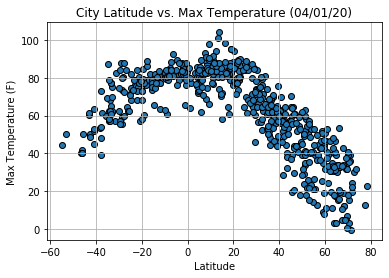

In [11]:
plt.scatter(df['Lat'], df['Max Temp'], edgecolor='black')
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

The code is plotting the Max Temperature on Latitude. We can see that the closer the latitude is to the equator, the warmer it gets. 

## Latitude vs. Humidity Plot

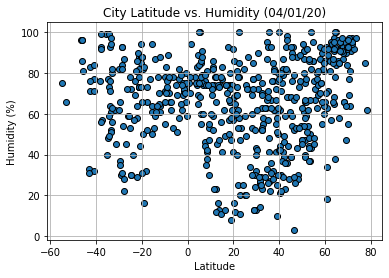

In [12]:
plt.scatter(df['Lat'], df['Humidity'], edgecolor='black')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

The code is plotting Humidity on Latitude. We can see that there is not much of a correlation between the two. Although, we can see a concentration in upper latitudes. 

## Latitude vs. Cloudiness Plot

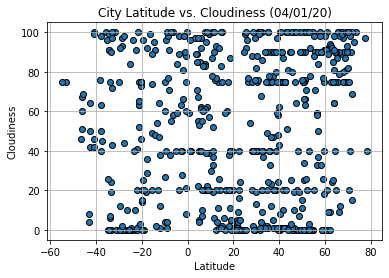

In [13]:
plt.scatter(df['Lat'], df['Cloudiness'], edgecolor='black')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

The code displays Cloudiness on Latitude. There does not seem to be any correlation between the two. 

## Latitude vs. Wind Speed Plot

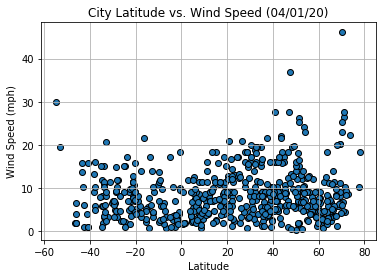

In [14]:
plt.scatter(df['Lat'], df['Wind Speed'], edgecolor='black')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()

The code is displaying Wind Speed on Latitude. Most speeds are under 10 miles per hour. There are some outliers above 30 miles per hour.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg(x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    fit = slope * x + intercept
    print(f'The r-squared is: {round(rvalue,3)}')
    equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
    print(f'The equation is: {equation}')
    plt.scatter(x,y)
    plt.plot(x,fit,"r-")
    plt.xlabel('Latitude')
    #plt.annotate(equation, (25,0))
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
df_north = df[df['Lat'] >= 0]

df_south = df[df['Lat'] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.872
The equation is: y = -1.01x + 95.67


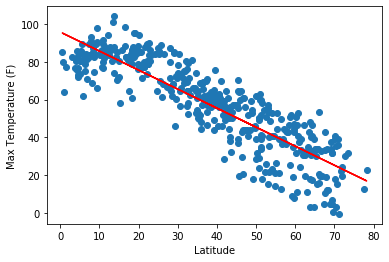

In [17]:
plt.ylabel('Max Temperature (F)')
reg(df_north['Lat'], df_north['Max Temp'])


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.743
The equation is: y = 0.71x + 87.48


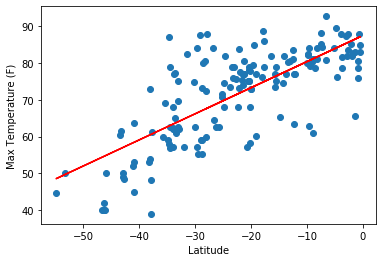

In [18]:
plt.ylabel('Max Temperature (F)')
reg(df_south['Lat'], df_south['Max Temp'])

- (North) For every unit increase in Latitude, Max Temperature decreases 1.01 units.
- (South) For every unit increase in Latitude, Max Temperature rises 0.71 units.
- There is a high correlation between the variables for both hemispheres.
- The closer we get to the equator, the warmer it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.239
The equation is: y = 0.27x + 54.35


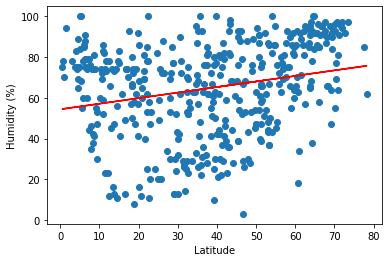

In [19]:
plt.ylabel('Humidity (%)')
reg(df_north['Lat'], df_north['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.007
The equation is: y = -0.01x + 68.09


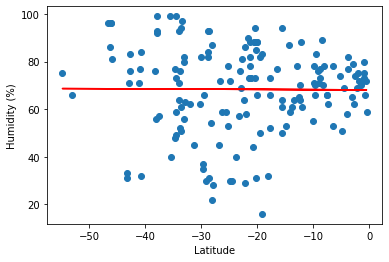

In [20]:
plt.ylabel('Humidity (%)')
reg(df_south['Lat'], df_south['Humidity'])

- (North) For every unit increase in Latitude, Humidity increases 0.27 units.
- (South) For every unit increase in Latitude, Humidity decreases 0.01 units.
- There is no correlation between the variables for either hemispheres. We cannot use this model.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2
The equation is: y = 0.38x + 35.77


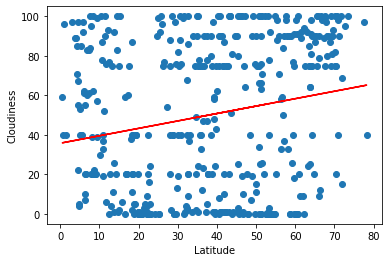

In [21]:
plt.ylabel('Cloudiness')
reg(df_north['Lat'], df_north['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.097
The equation is: y = 0.27x + 54.98


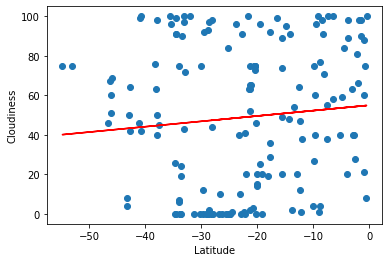

In [22]:
plt.ylabel('Cloudiness')
reg(df_south['Lat'], df_south['Cloudiness'])

- (North) For every unit increase in Latitude, Cloudiness increases 0.38 units.
- (South) For every unit increase in Latitude, Cloudiness increases 0.27 units.
- There is no correlation between the variables for either hemispheres. We cannot use this model.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.112
The equation is: y = 0.03x + 7.53


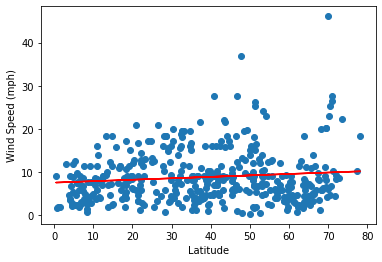

In [23]:
plt.ylabel('Wind Speed (mph)')
reg(df_north['Lat'], df_north['Wind Speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22
The equation is: y = -0.09x + 5.47


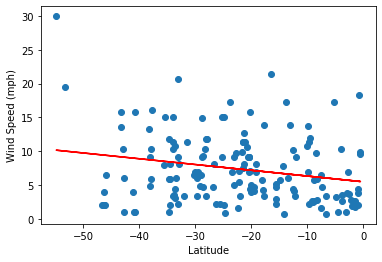

In [24]:
plt.ylabel('Wind Speed (mph)')
reg(df_south['Lat'], df_south['Wind Speed'])

- (North) For every unit increase in Latitude, Wind Speed increases 0.03 units.
- (South) For every unit increase in Latitude, Wind Speed decreases 0.09 units.
- There is no correlation between the variables for either hemispheres. We cannot use this model.